AttributeError: 'Index' object has no attribute 'year'

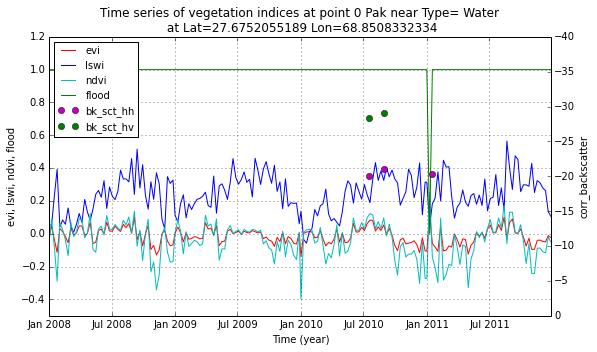

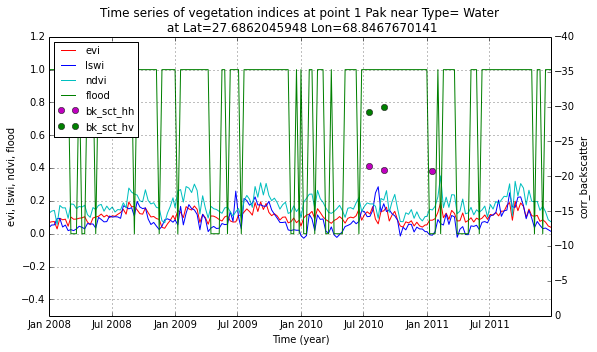

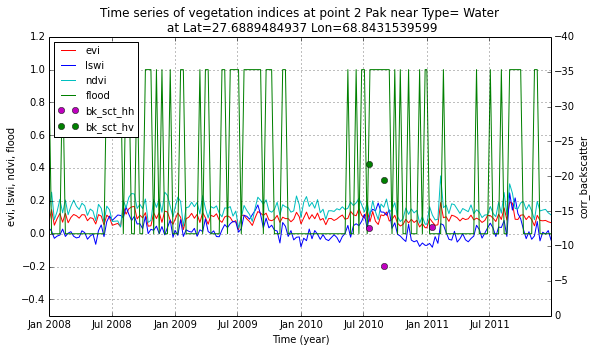

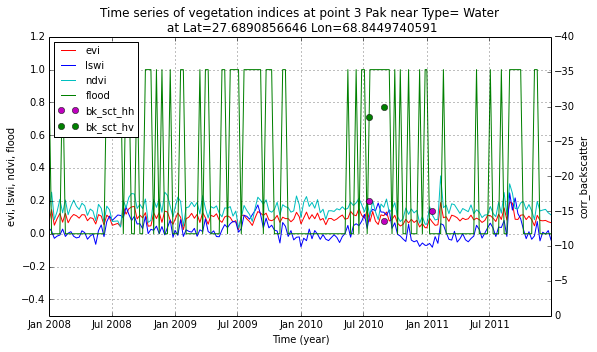

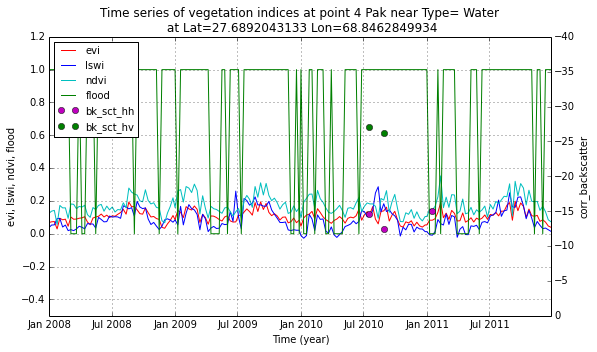

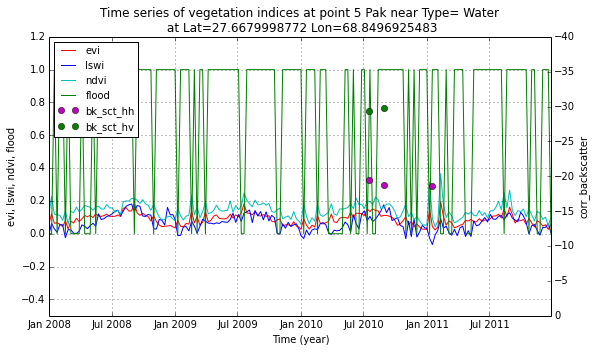

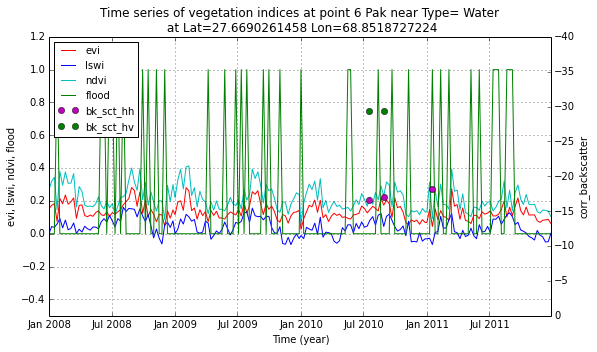

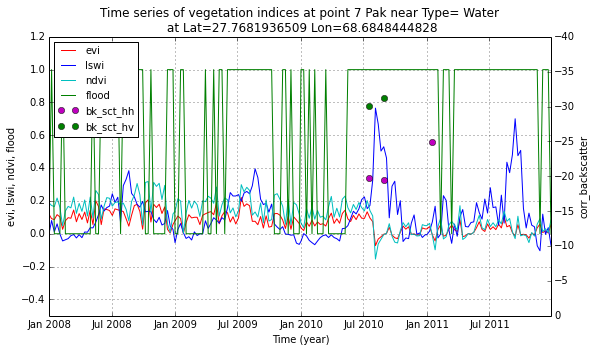

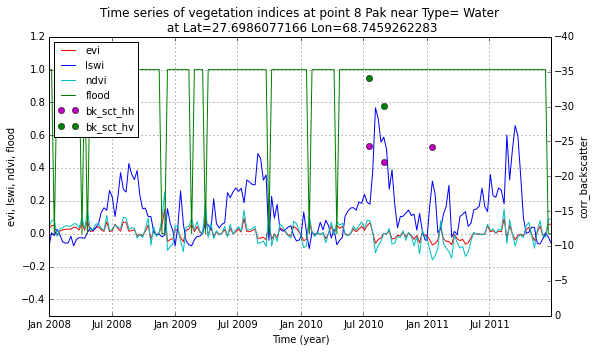

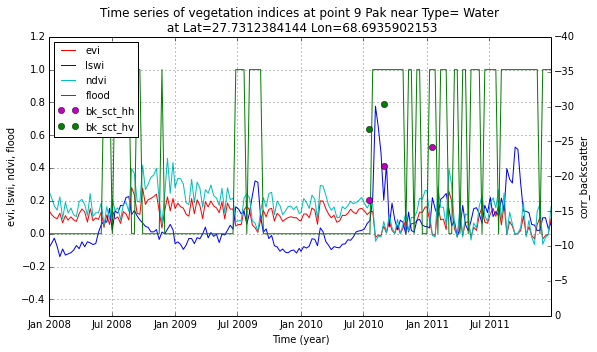

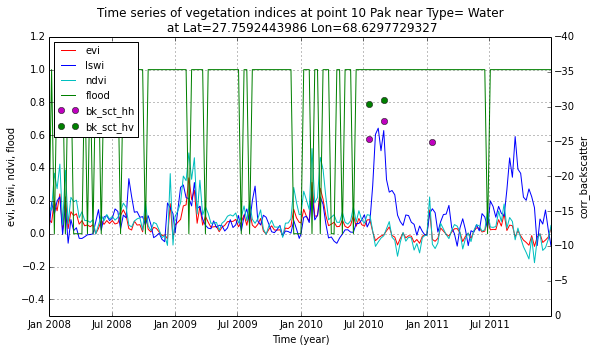

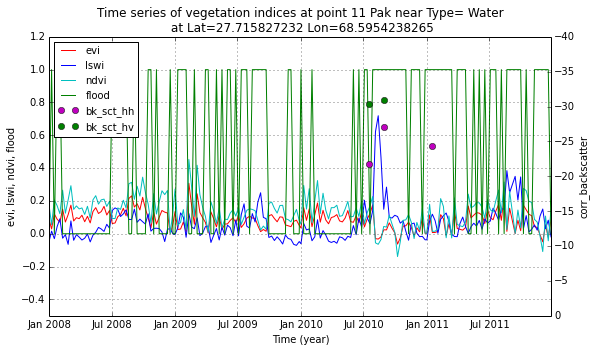

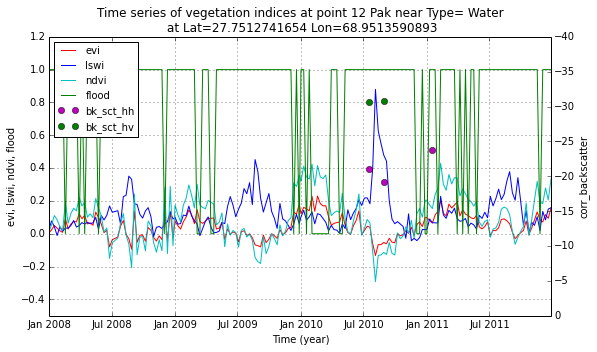

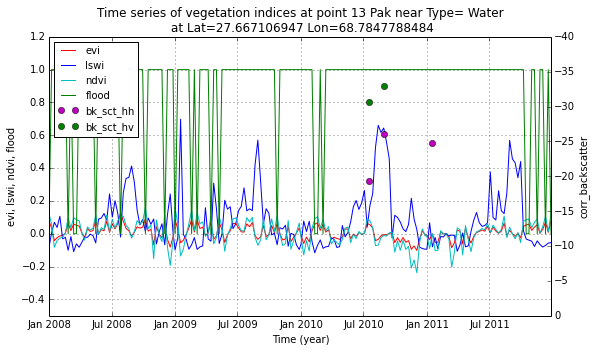

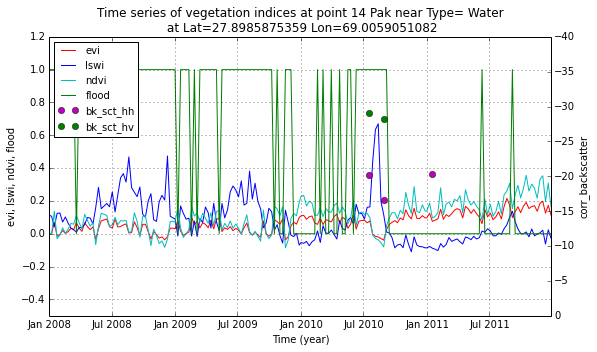

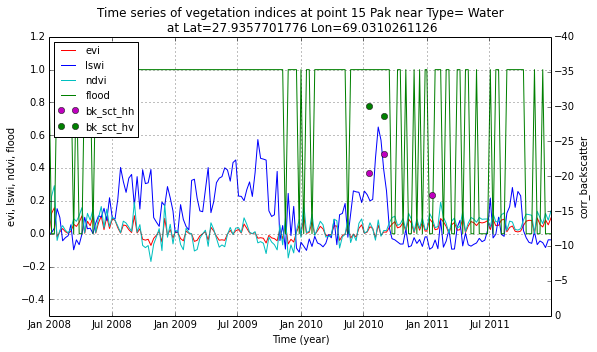

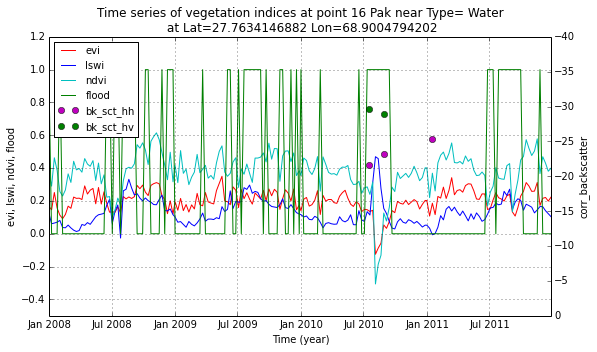

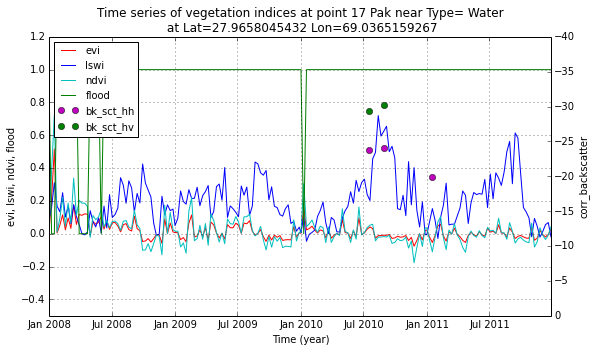

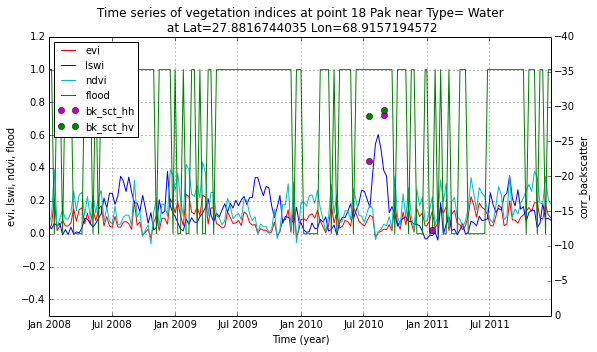

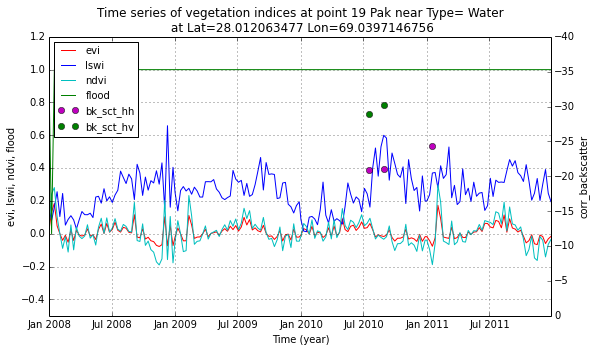

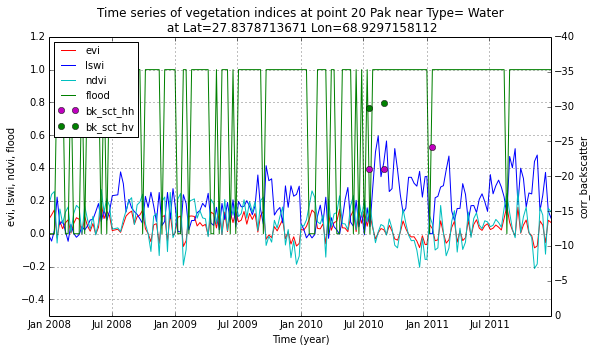

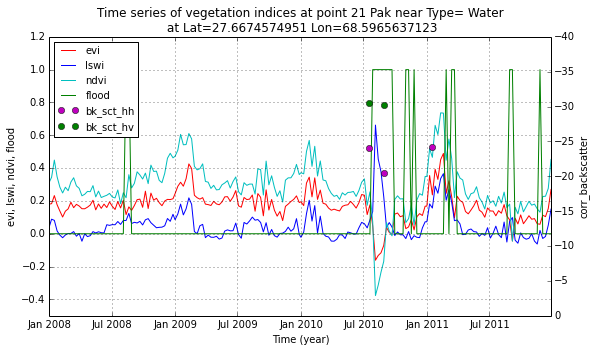

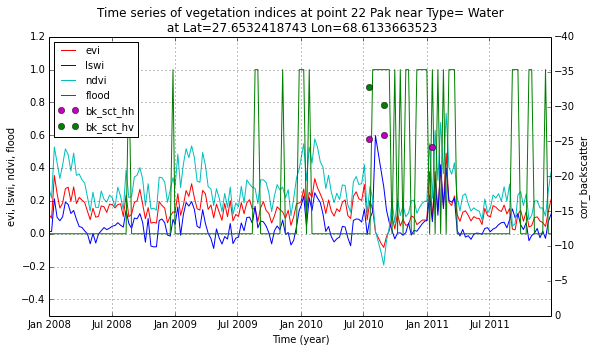

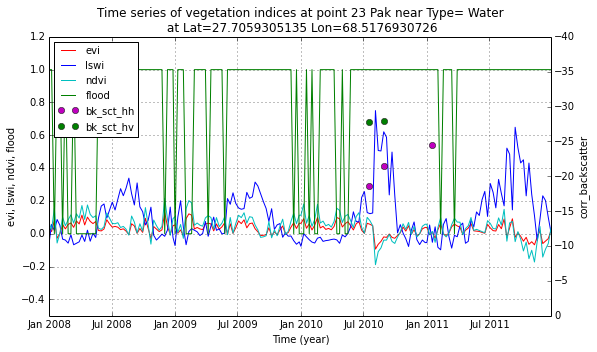

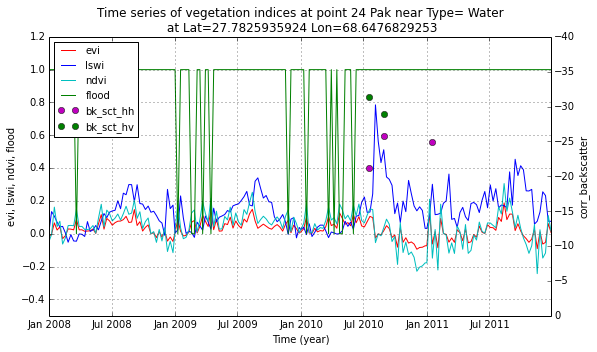

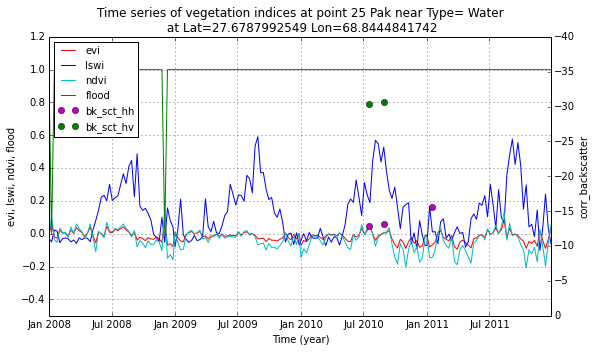

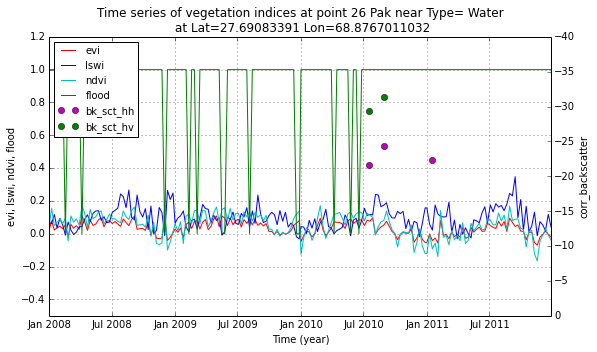

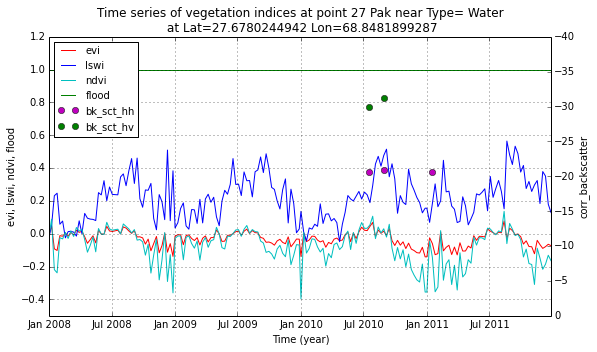

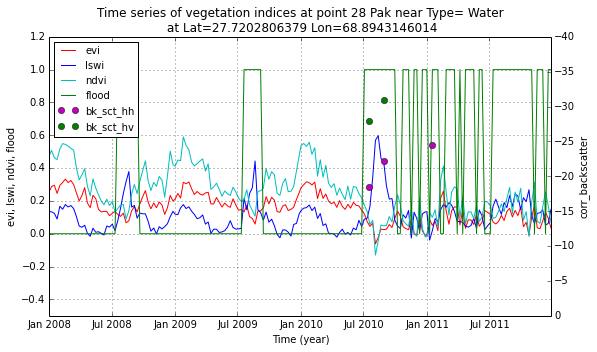

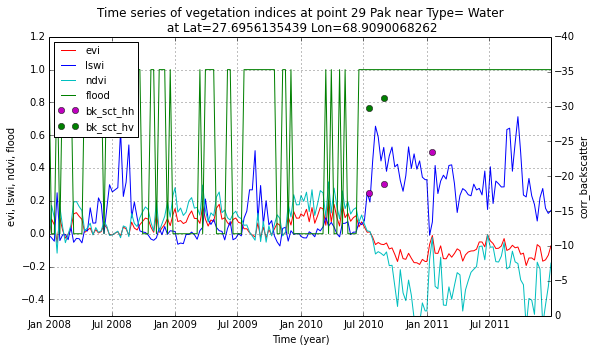

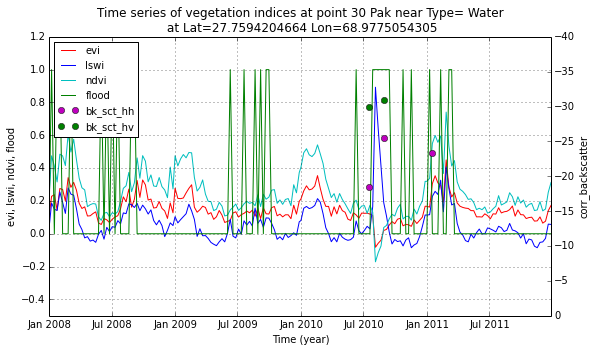

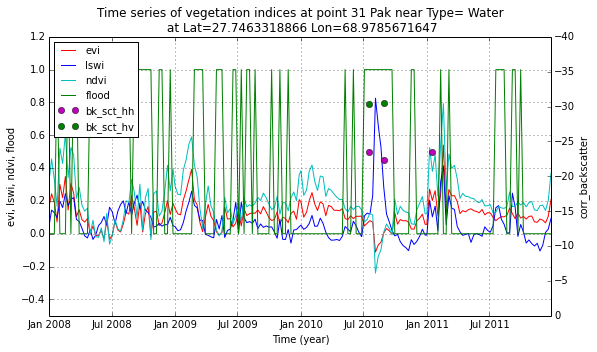

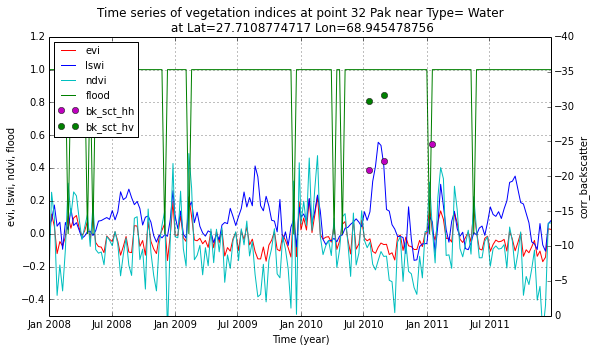

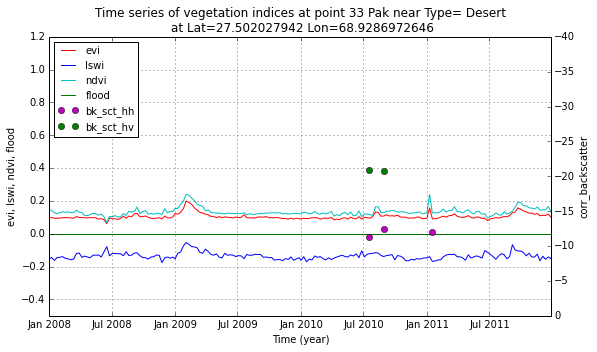

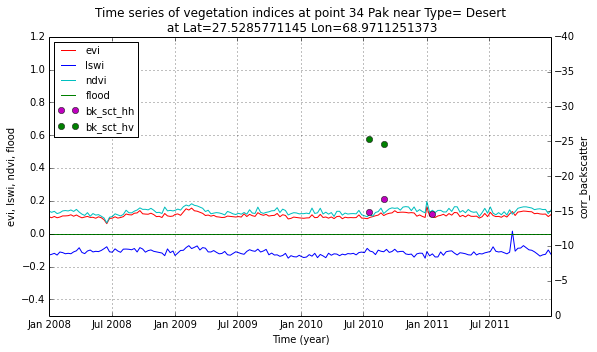

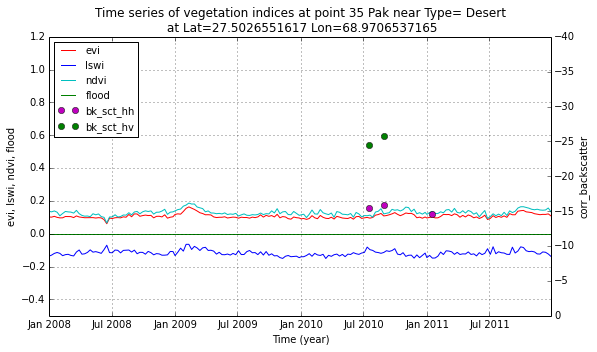

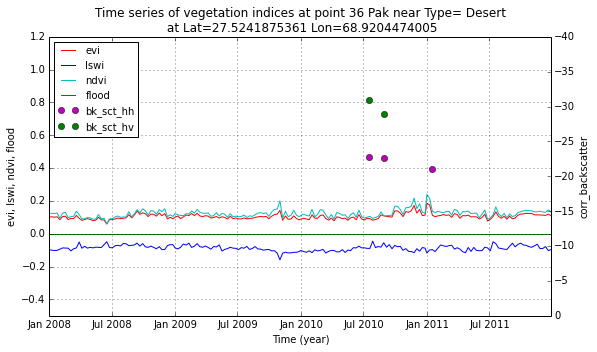

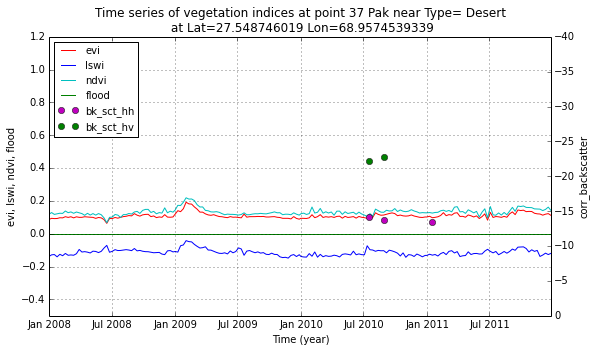

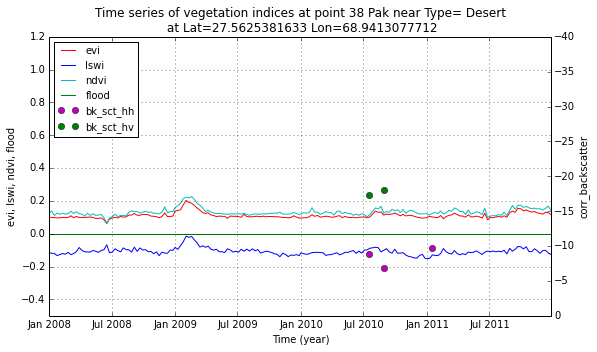

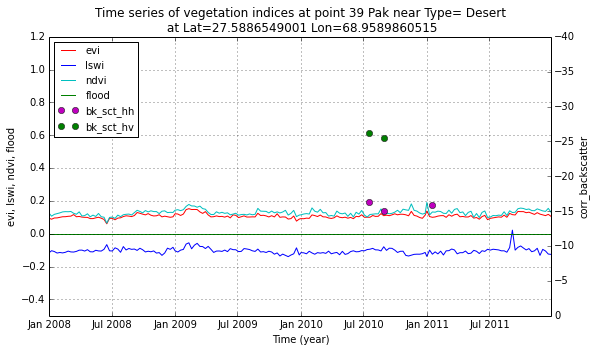

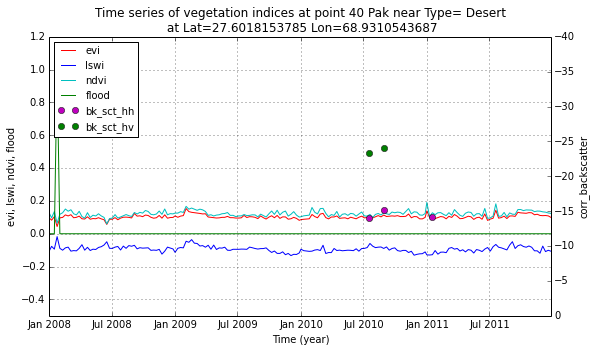

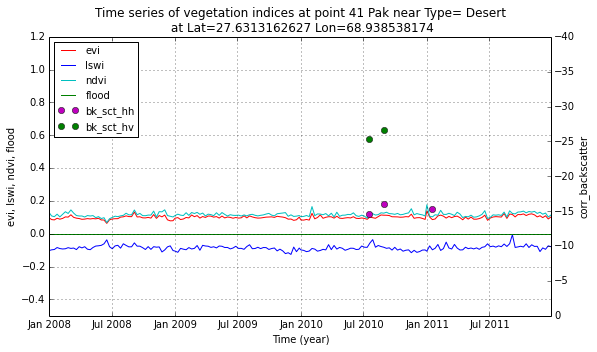

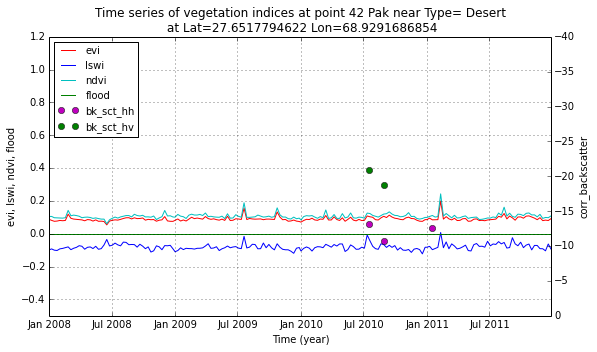

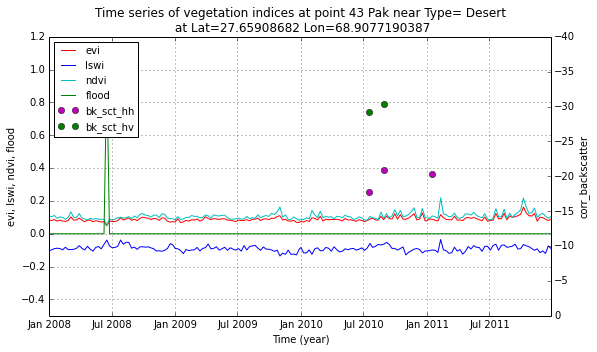

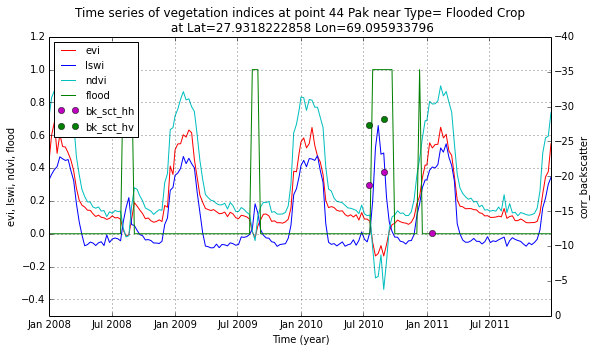

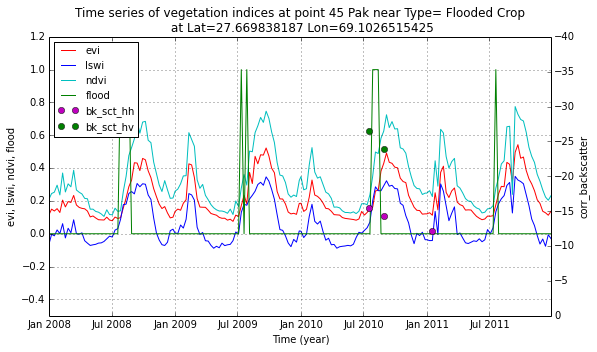

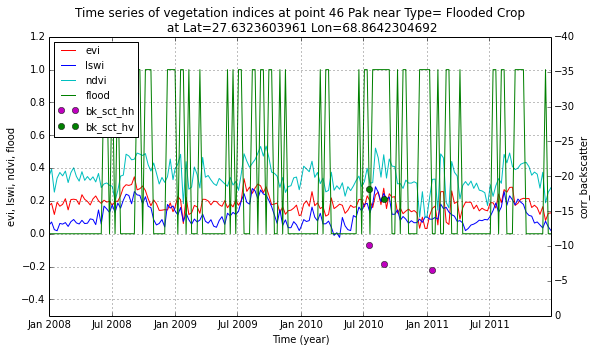

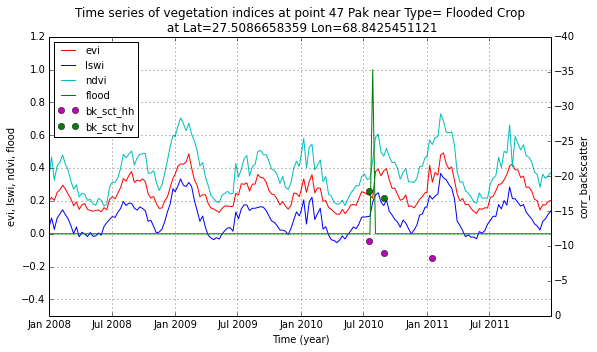

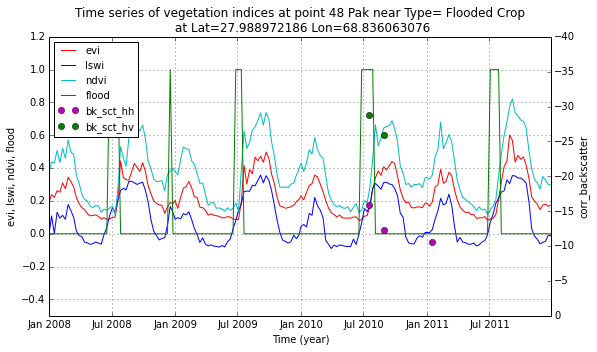

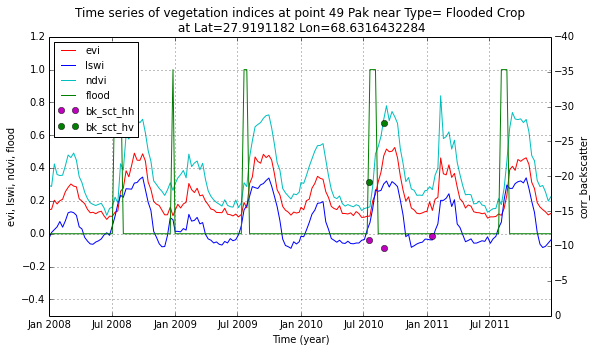

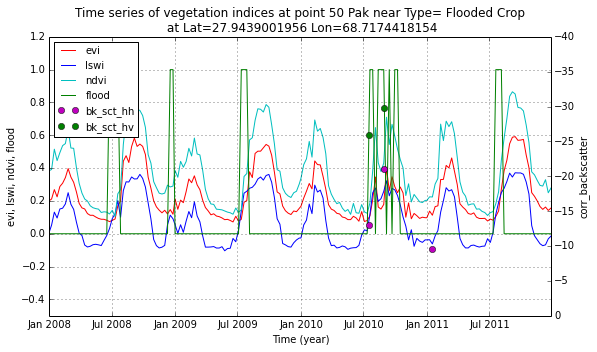

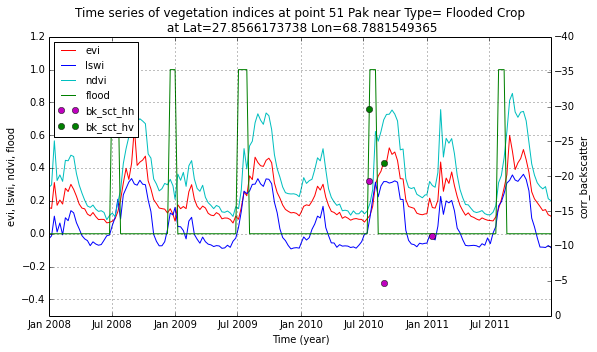

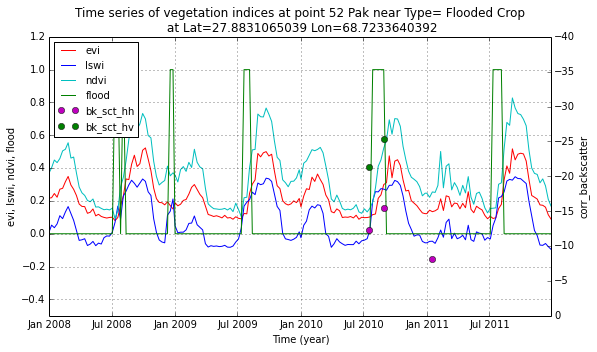

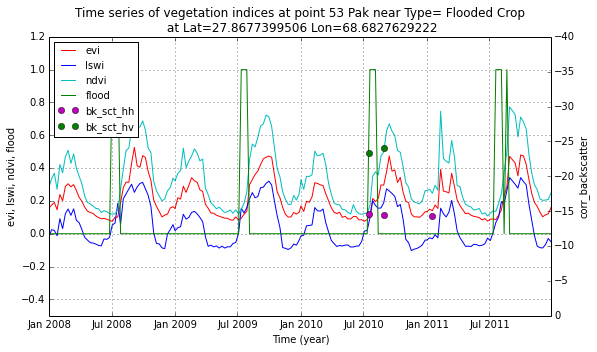

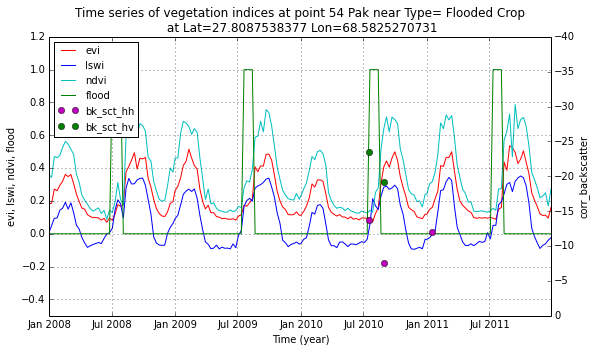

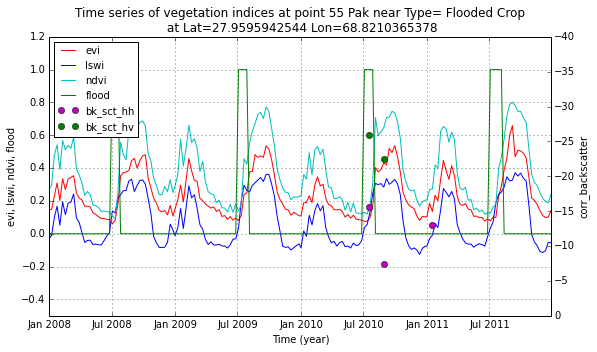

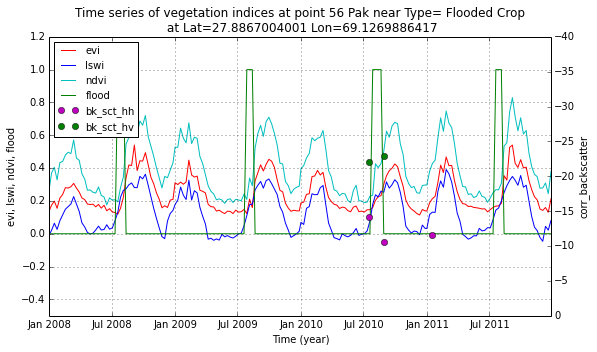

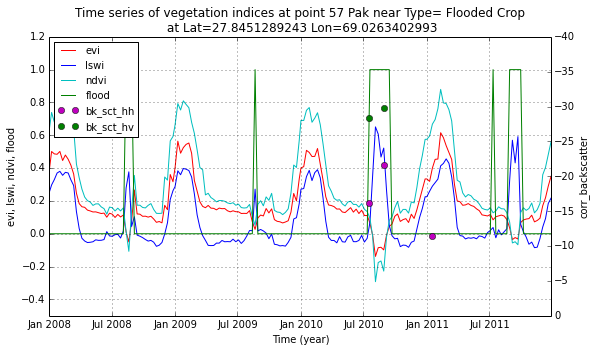

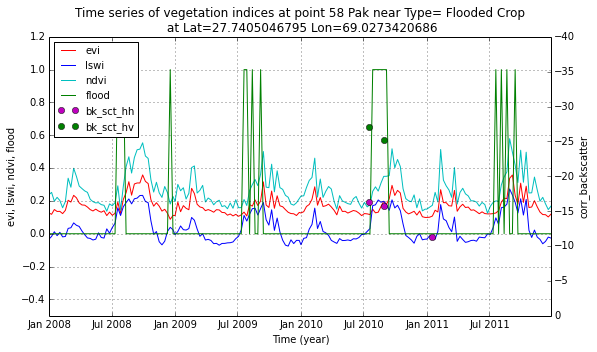

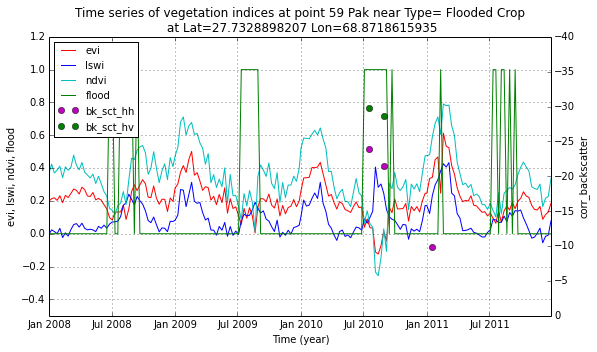

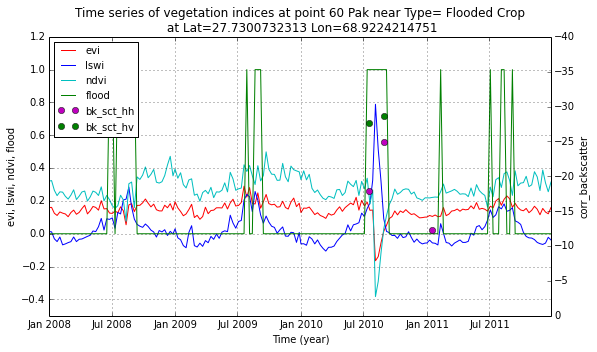

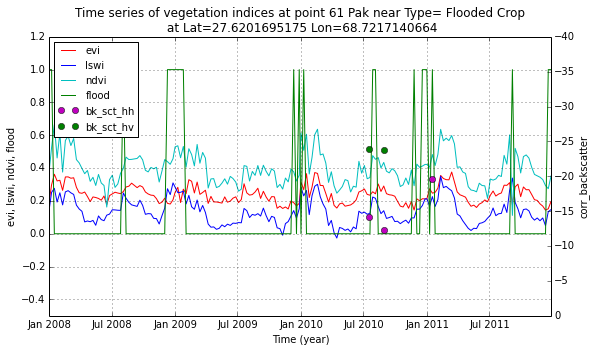

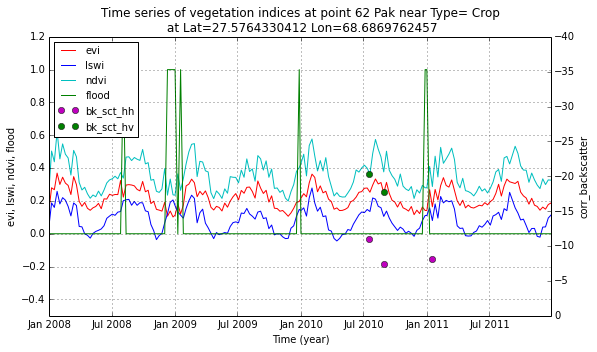

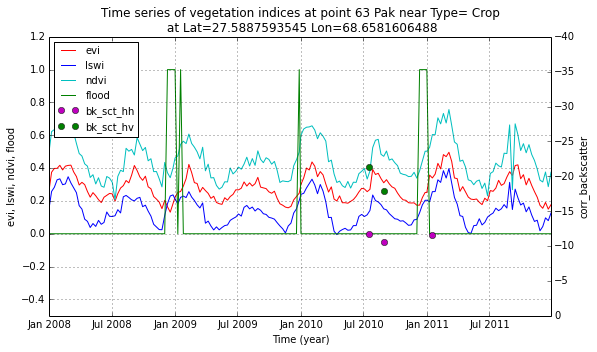

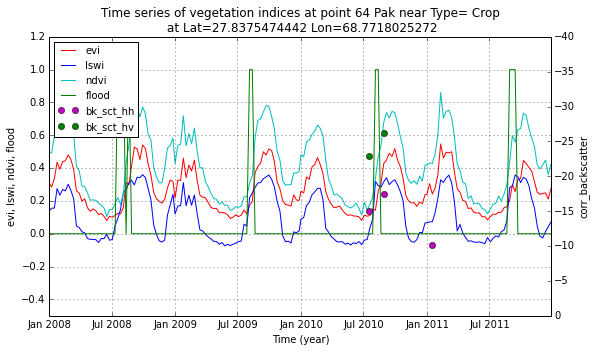

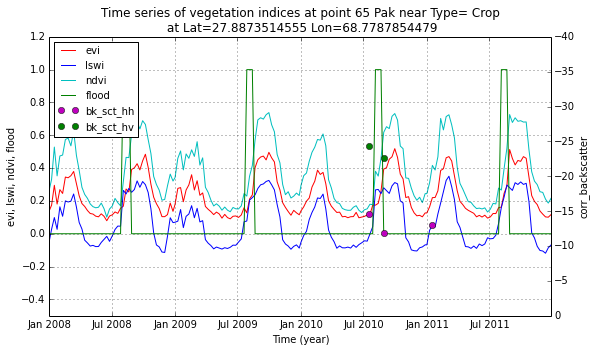

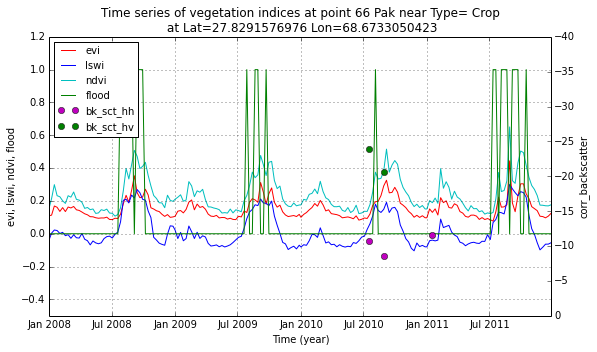

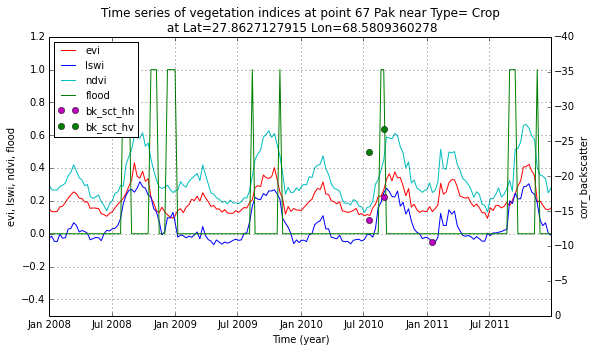

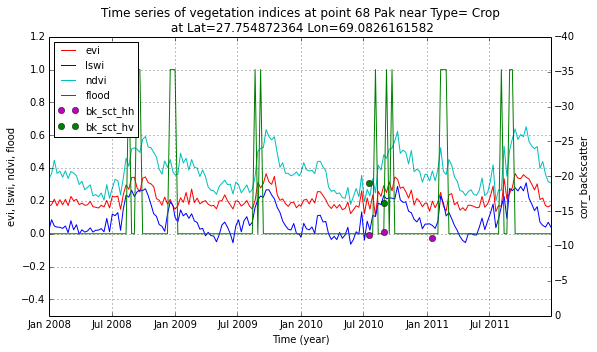

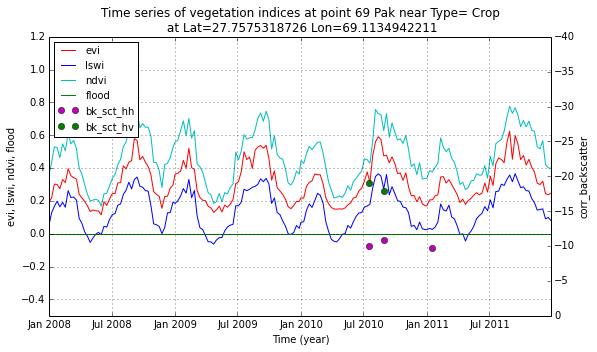

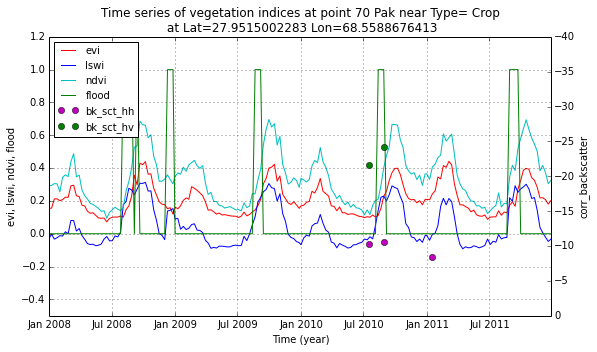

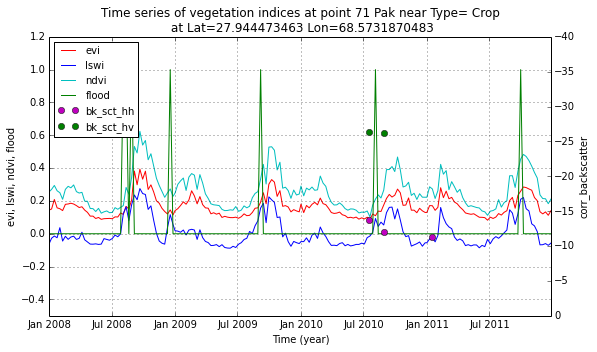

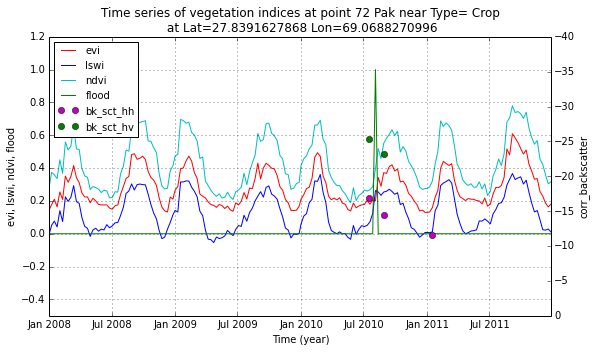

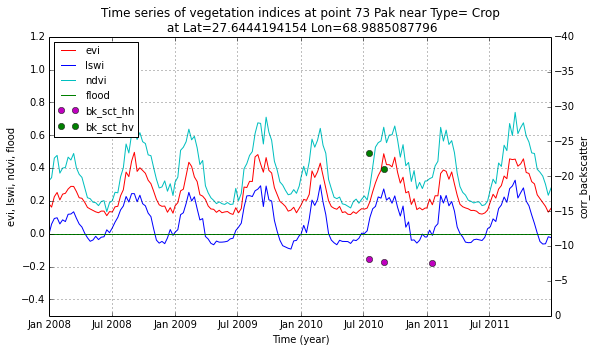

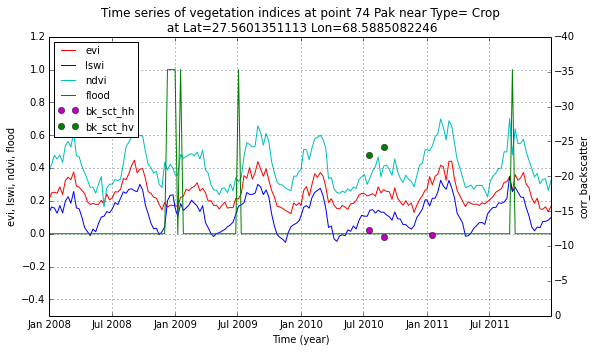

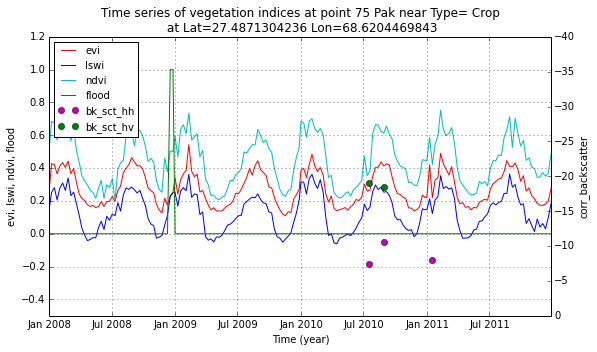

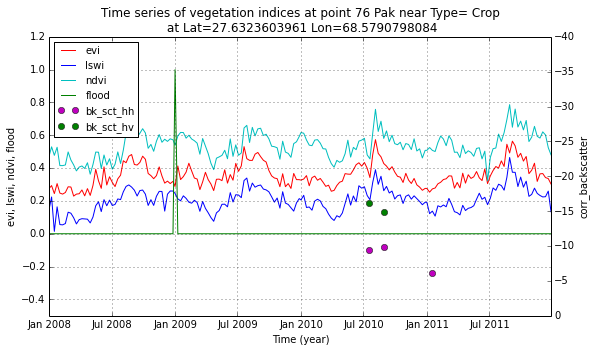

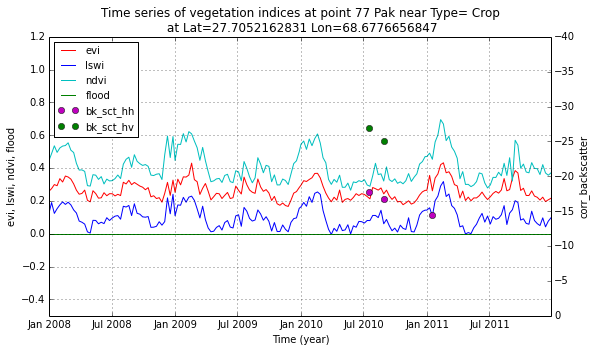

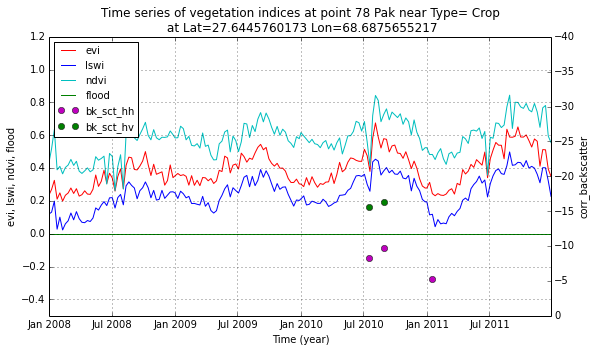

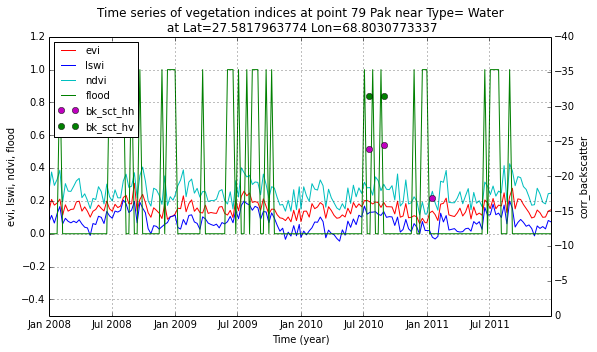

In [37]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import time as t


index_path= "/home/faizan/USA_data/index_output/all_year.csv"
yeild_path= "/home/faizan/USA_data/index_output/US_near_yeild.csv"
pic_path = "/home/faizan/USA_data/image_output/yeild_anomaly/"
ti= "Time series of vegetation indices at point " 

CNTY = "US"
LOC = "near"

if CNTY == "Pak":
    if LOC == "near":
        R = 83
        A , B = 2007 , 2012
    else:
        R = 62
        A , B = 2007 , 2012
else:
    if LOC == "near":
        R = 83
        A , B = 2005 , 2010
    else:
        R = 63
        A , B = 2005 , 2010
  
for i in range (R):
    
    data = pd.read_csv(index_path)
    
    data1 = data[data["ID"] == i]
    data1 = data1[data1["CNTY"] == CNTY]
    data2 = data1[data1["LOC"] == LOC]
    data2 = data2[data2["EVI"] >-999]
    dates = [datetime.datetime.strptime(str(j[:10]), "%Y-%m-%d") for j in data2["DATE"]]
    data2.index = dates
    dummy = data2[data2.index.year > A]
    dummy = dummy[dummy.index.year < B]
    time = dummy.index
    evi  = dummy["EVI"]
    ndvi = dummy["NDVI"]
    lswi = dummy["LSWI"]
    flood = dummy["FLOOD"]

    data = pd.read_csv(palsar_path)
    data1 = data[data["ID"] == i]
    data1 = data1[data1["CNTY"] == CNTY]
    data2 = data1[data1["LOC"] == LOC]
    dates = [datetime.datetime.strptime(str(j[:10]), "%Y-%m-%d") for j in data2["DATE"]]
    data2.index = dates
    time2= data2.index[data2["POL"] == "HH"]
    bs_hh = data2["BS"][data2["POL"] == "HH"]
    time3= data2.index[data2["POL"] == "HV"]
    bs_hv = data2["BS"][data2["POL"] == "HV"]
    lat=pd.Series.mean(data2["LAT"])
    lon=pd.Series.mean(data2["LON"])
    typ=pd.Series.mean(data2["TYP"])
    if typ == 1:
        area="Water"
    elif typ == 2:
        area=  "Crop"
    elif typ == 3:
        area= "Flooded Crop"
    else:
        area = "Desert"

    fig = plt.figure(figsize=(9,5))
    ax = fig.add_subplot(111)

    lns1 = ax.plot(time, evi, 'r', label = 'evi')
    lns2 = ax.plot(time, lswi, 'b', label = 'lswi')
    lns3 = ax.plot(time, ndvi, 'c', label = 'ndvi')
    lns4 = ax.plot(time, flood, 'g', label = 'flood')
    ax2 = ax.twinx()
    lns5 = ax2.plot(time2, bs_hh , 'mo', label = 'bk_sct_hh')
    lns6 = ax2.plot(time3, bs_hv , 'go', label = 'bk_sct_hv')

    # added these lines
    lns = lns1+lns2+lns3+lns4+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=2, prop={'size':10})
    Title= ti + str(i)+ " " + CNTY +" "+ LOC+ " Type= " +area +  "\n" " at Lat=" +str(lat) + " Lon=" +str(lon) 
    ax.grid()
    ax.set_title(Title)
    ax.set_xlabel("Time (year)")
    ax.set_ylabel("evi, lswi, ndvi, flood")
    ax2.set_ylabel("corr_backscatter")
    ax2.set_ylim(0, -40)
    ax.set_ylim(-0.5,1.2)
    
    pic= pic_path+ CNTY+"_"+LOC+str(i)+".png"
    fig.savefig(pic)

<function matplotlib.pyplot.show>

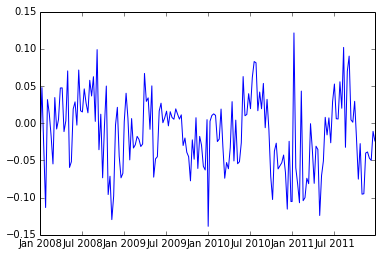

In [30]:
from matplotlib import pyplot as plt

plt.plot(time, dummy["EVI"])
plt.show


In [45]:

import Image

#opens an image:

new_im = Image.new('RGB', (8190,4500))

#Here I resize my opened image, so it is no bigger than 100,100
#im.thumbnail((800,500))
#Iterate through a 4 by 4 grid with 100 spacing, to place my image
n = 0 
for i in xrange(0,8190,910):   #810x500
    for j in xrange(0,4500,500):
           
        im = Image.open("/home/faizan/USA_data/image_output/yeild_anomaly/US_all_near%s.png" % n)
#creates a new empty image, RGB mode, and size 400 by 400.
        #I change brightness of the images, just to emphasise they are unique copies.
                #paste the image at location i,j:
        new_im.paste(im, (i,j))
        n += 1
        if n==82:
            break 
new_im.save("/home/faizan/USA_data/image_output/yeild_anomaly/US_near_yeild.png")

In [44]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import time as t


index_path= "/home/faizan/USA_data/index_output/all_year.csv"
yeild_path= "/home/faizan/USA_data/index_output/US_far_yeild.csv"
pic_path = "/home/faizan/USA_data/image_output/yeild_anomaly/"
ti= "Time series of vegetation indices at point " 

CNTY = "US"
LOC = "far"

if CNTY == "Pak":
    if LOC == "near":
        R = 80
        A , B = 1999 , 2015
    else:
        R = 62
        A , B = 1999 , 2015
else:
    if LOC == "near":
        R = 83
        A , B = 1999 , 2011
    else:
        R = 63
        A , B = 1999 , 2011
  
for i in range (R):
    
    data = pd.read_csv(index_path)
    
    data1 = data[data["ID"] == i]
    data1 = data1[data1["CNTY"] == CNTY]
    data2 = data1[data1["LOC"] == LOC]
    data2 = data2[data2["EVI"] >-999]
    dates = [datetime.datetime.strptime(str(j[:10]), "%Y-%m-%d") for j in data2["DATE"]]
    data2.index = dates
    dummy = data2
    #dummy = data2[data2.index.year > A]
    #dummy = dummy[dummy.index.year < B]
    time = dummy.index
    evi  = dummy["EVI"]
    ndvi = dummy["NDVI"]
    lswi = dummy["LSWI"]
    flood = dummy["FLOOD"]
    
    lat=pd.Series.mean(data2["LAT"])
    lon=pd.Series.mean(data2["LON"])
    typ=pd.Series.mean(data2["TYP"])
    
    data = pd.read_csv(yeild_path)
    data1 = data[data["ID"] == i]
    dates = [datetime.datetime.strptime((str(j)+"-11"), "%Y-%m") for j in data1["year"]]
    data1.index = dates
    dummy = data1
    dummy = data1[data1.index.year > A]
    dummy = dummy[dummy.index.year < B]
    time2= dummy.index
    yld = dummy["yield_anomaly"]
    #dates2 = [datetime.datetime.strptime(str(j+1), "%Y") for j in dummy["year"]]
    #time2=dates2
    nor = []
    for k in  range(len(dummy)):
        time2
        nor.append(1)

    if typ == 1:
        area="Water"
    elif typ == 2:
        area=  "Crop"
    elif typ == 3:
        area= "Flooded Crop"
    else:
        area = "Desert"

    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)

    lns1 = ax.plot(time, evi, 'r', label = 'evi')
    lns2 = ax.plot(time, lswi, 'b', label = 'lswi')
    lns3 = ax.plot(time, ndvi, 'c', label = 'ndvi')
    lns4 = ax.plot(time, flood, 'g', label = 'flood')
    ax2 = ax.twinx()
    lns5 = ax2.plot(time2, yld , 'ro', label = 'yield_anomaly')
    lns6 = ax2.plot(time2, nor , 'k', label = 'normal')

    # added these lines
    lns = lns1+lns2+lns3+lns4+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=2, prop={'size':10})
    Title= ti + str(i)+ " " + CNTY +" "+ LOC+ " Type= " +area +  "\n" " at Lat=" +str(lat) + " Lon=" +str(lon) 
    ax.grid()
    ax.set_title(Title)
    ax.set_xlabel("Time (year)")
    ax.set_ylabel("evi, lswi, ndvi, flood")
    ax2.set_ylabel("Yield_anomaly")
    ax2.set_ylim(0.5, 1.5)
    ax.set_ylim(-0.5,1.2)
    
    pic= pic_path+ CNTY+"_all_"+LOC+str(i)+".png"
    fig.savefig(pic)

In [14]:
nor = []
for i in  range(len(dummy)):
    nor.append(1)


In [3]:

import Image
import  os
#opens an image:

new_im = Image.new('RGB', (5600,10400))

#Here I resize my opened image, so it is no bigger than 100,100
#im.thumbnail((800,500))
#Iterate through a 4 by 4 grid with 100 spacing, to place my image
n = 0 
for i in xrange(0,5600,1400):   #810x500
    for j in xrange(0,3000,500):
        if os.path.exists("/home/faizan/USA_data/image_output/yeild_anomaly1/US_all_near%s.png" % n) is True:
           
            im = Image.open("/home/faizan/USA_data/image_output/yeild_anomaly1/US_all_near%s.png" % n)
    #creates a new empty image, RGB mode, and size 400 by 400.
            #I change brightness of the images, just to emphasise they are unique copies.
                    #paste the image at location i,j:
        new_im.paste(im, (i,j))
        n += 1
        if n==26:
            break 
new_im.save("/home/faizan/USA_data/image_output/yeild_anomaly1/US_yeild_near.png")

In [17]:

import Image
import  os
#opens an image:

new_im = Image.new('RGB', (5600,3000))

#Here I resize my opened image, so it is no bigger than 100,100
#im.thumbnail((800,500))
#Iterate through a 4 by 4 grid with 100 spacing, to place my image
n = 0 
Array= []
for K in range(63):
    if os.path.exists("/home/faizan/USA_data/image_output/yeild_anomaly1/US_all_far%s.png" % n) is True:
        Array.append("/home/faizan/USA_data/image_output/yeild_anomaly1/US_all_far%s.png" % n) 
    n += 1 
k = 0
for i in xrange(0,5600,1400):   #810x500
    for j in xrange(0,3000,500):
        im = Image.open(Array[k])
    #creates a new empty image, RGB mode, and size 400 by 400.
            #I change brightness of the images, just to emphasise they are unique copies.
                    #paste the image at location i,j:
        new_im.paste(im, (i,j))
        k += 1    
        if k==len(Array):
            break 
new_im.save("/home/faizan/USA_data/image_output/yeild_anomaly1/US_yeild_far.png")


In [15]:
Array[0]


'/home/faizan/USA_data/image_output/yeild_anomaly1/US_all_near0.png'

In [4]:

import Image
import  os
#opens an image:

new_im = Image.new('RGB', (5600,3500))

#Here I resize my opened image, so it is no bigger than 100,100
#im.thumbnail((800,500))
#Iterate through a 4 by 4 grid with 100 spacing, to place my image
n = 0 
for K in range(63):
    if os.path.exists("/home/faizan/USA_data/image_output/yeild_anomaly1/US_all_far%s.png" % n) is True:
        for i in xrange(0,5600,1400):   #810x500
            for j in xrange(0,3500,500):
                im = Image.open("/home/faizan/USA_data/image_output/yeild_anomaly1/US_all_far%s.png" % n)
            #creates a new empty image, RGB mode, and size 400 by 400.
                    #I change brightness of the images, just to emphasise they are unique copies.
                            #paste the image at location i,j:
                new_im.paste(im, (i,j))
        n += 1
    n += 1    
    if n==83:
        break 
new_im.save("/home/faizan/USA_data/image_output/yeild_anomaly1/US_yeild_far.png")

In [26]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import time as t


index_path= "/home/faizan/USA_data/index_output/all_year.csv"
yeild_path= "/home/faizan/USA_data/index_output/US_far_yeild.csv"
pic_path = "/home/faizan/USA_data/image_output/yeild_anomaly/"
ti= "Time series of vegetation indices, flood and yeild " 

CNTY = "US"
LOC = "near"

if CNTY == "Pak":
    if LOC == "near":
        R = 80
        A , B = 2001 , 2015
    else:
        R = 62
        A , B = 1999 , 2015
else:
    if LOC == "near":
        R = 83
        A , B = 2000 , 2004
    else:
        R = 63
        A , B = 1999 , 2011
  
for i in range (33,34):
    
    data = pd.read_csv(index_path)
    
    data1 = data[data["ID"] == i]
    data1 = data1[data1["CNTY"] == CNTY]
    data2 = data1[data1["LOC"] == LOC]
    data2 = data2[data2["EVI"] >-999]
    dates = [datetime.datetime.strptime(str(j[:10]), "%Y-%m-%d") for j in data2["DATE"]]
    data2.index = dates
    dummy = data2
    dummy = data2[data2.index.year > A]
    dummy = dummy[dummy.index.year < B]
    time = dummy.index
    evi  = dummy["EVI"]
    ndvi = dummy["NDVI"]
    lswi = dummy["LSWI"]
    flood = dummy["FLOOD"]
    
    lat=pd.Series.mean(data2["LAT"])
    lon=pd.Series.mean(data2["LON"])
    typ=pd.Series.mean(data2["TYP"])
    
    data = pd.read_csv(yeild_path)
    data1 = data[data["ID"] == i]
    dates = [datetime.datetime.strptime((str(j)+"-11"), "%Y-%m") for j in data1["year"]]
    data1.index = dates
    dummy = data1
    dummy2 = data1[data1.index.year > (A-1)]
    dummy2 = dummy2[dummy2.index.year < B]
    time1= dummy2.index
    dummy = data1[data1.index.year > A]
    dummy = dummy[dummy.index.year < B]
    time2= dummy.index
    yld = dummy["yield_anomaly"]
    #dates2 = [datetime.datetime.strptime(str(j+1), "%Y") for j in dummy["year"]]
    #time2=dates2
    nor = []
    for k in  range(len(dummy2)):
        time1
        nor.append(1)

    if typ == 1:
        area="Water"
    elif typ == 2:
        area=  "Crop"
    elif typ == 3:
        area= "Flooded Crop"
    else:
        area = "Desert"

    fig = plt.figure(figsize=(7,6.5))
    ax = fig.add_subplot(111)

    lns1 = ax.plot(time, evi, 'b', label = 'evi')
    #lns2 = ax.plot(time, lswi, 'b', label = 'lswi')
    #lns3 = ax.plot(time, ndvi, 'c', label = 'ndvi')
    lns4 = ax.plot(time, flood, 'g', label = 'flood')
    ax2 = ax.twinx()
    lns5 = ax2.plot(time2, yld , 'ro', label = 'yield_anomaly')
    lns6 = ax2.plot(time1, nor , 'r--', label = 'normal')

    # added these lines
    lns = lns1+lns4+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=2, prop={'size':14})
    Title= ti 
    ax.grid()
    ax.set_title(Title, fontsize=16)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("evi, flood" ,fontsize=12)
    ax2.set_ylabel("Yield_anomaly", fontsize=12)
    ax2.set_ylim(0.6, 1.5)
    ax.set_ylim(-0.2,1.2)
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(10) 
                tick.label.set_rotation(45)
    pic= pic_path+"y1.png"
    fig.savefig(pic)